<a href="https://colab.research.google.com/github/Anshuu03/Insurance_fruad_detection-and-prevention/blob/main/CodSoft_Task2_Movie_rating_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CodSoft | Data Science Internship***



***Movie Rating Prediction | | Task 2***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
mvdf=pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')
mvdf.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
print(mvdf.shape)
print(mvdf.nunique())

(15509, 10)
Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64


In [ ]:
mvdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
mvdf=mvdf.drop(['Name','Actor 3'],axis=1)
mvdf.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta


In [ ]:
print(mvdf['Genre'].value_counts())
print(mvdf['Votes'].value_counts())

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64
Votes
8        227
7        224
9        221
6        213
10       175
        ... 
1,754      1
1,208      1
1,148      1
1,277      1
1,496      1
Name: count, Length: 2034, dtype: int64


In [ ]:
mvdf.isna().sum()

,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384


In [ ]:
mvdf=mvdf.dropna()
print(mvdf.isna().sum())
print(mvdf.head())

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
dtype: int64
     Year Duration                      Genre  Rating  Votes        Director  \
1  (2019)  109 min                      Drama     7.0      8   Gaurav Bakshi   
3  (2019)  110 min            Comedy, Romance     4.4     35      Ovais Khan   
5  (1997)  147 min     Comedy, Drama, Musical     4.7    827    Rahul Rawail   
6  (2005)  142 min        Drama, Romance, War     7.4  1,086  Shoojit Sircar   
8  (2012)   82 min  Horror, Mystery, Thriller     5.6    326   Allyson Patel   

           Actor 1                 Actor 2  
1     Rasika Dugal          Vivek Ghamande  
3          Prateik              Ishita Raj  
5       Bobby Deol  Aishwarya Rai Bachchan  
6  Jimmy Sheirgill          Minissha Lamba  
8        Yash Dave          Muntazir Ahmad  


***The null values were removed for further analysis values could have been replaced with mean or mode but the there exists outliers so the mean is very far from the middle***

In [ ]:
mvdf[['Year','Duration','Votes']] = mvdf[['Year','Duration','Votes']].astype(str)
mvdf['Year'] = mvdf['Year'].str.strip('()').astype(int)
mvdf['Duration'] = mvdf['Duration'].str.replace(' min','').astype(int)
mvdf['Votes'] = mvdf['Votes'].str.replace(',','').astype(int)

In [ ]:
mvdf.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad


In [ ]:
mvdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5705 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5705 non-null   int64  
 1   Duration  5705 non-null   int64  
 2   Genre     5705 non-null   object 
 3   Rating    5705 non-null   float64
 4   Votes     5705 non-null   int64  
 5   Director  5705 non-null   object 
 6   Actor 1   5705 non-null   object 
 7   Actor 2   5705 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 401.1+ KB


In [ ]:
mvdf[['G1','G2','G3']]=mvdf['Genre'].str.split(',',expand=True)
mvdf

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,G1,G2,G3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Drama,None,None
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Biography,Drama,History
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Action,Crime,Drama
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Action,Drama,None


***slpited the movie category to 3 columns to keep only the first genre***

In [ ]:
le=LabelEncoder()
mvdf['D_n']=le.fit_transform(mvdf['Director'])
mvdf['A_1']=le.fit_transform(mvdf['Actor 1'])
mvdf['A_2']=le.fit_transform(mvdf['Actor 2'])
mvdf['G_1']=le.fit_transform(mvdf['G1'])



Directors=pd.DataFrame({'Director':mvdf['Director'].unique(),'Number':mvdf['D_n'].unique()})
Actors1=pd.DataFrame({'Actor1':mvdf['Actor 1'].unique(),'Number':mvdf['A_1'].unique()})
Actors2=pd.DataFrame({'Actor2':mvdf['Actor 2'].unique(),'Number':mvdf['A_2'].unique()})
Genres=pd.DataFrame({'Genre':mvdf['G1'].unique(),'Number':mvdf['G_1'].unique()})



mvdf=mvdf.drop(['G1','G2','G3','Genre','Actor 1','Director','Actor 2'],axis=1)
mvdf

,Year,Duration,Rating,Votes,D_n,A_1,A_2,G_1
1,2019,109,7.0,8,639,1376,2308,7
3,2019,110,4.4,35,1352,1221,730,4
5,1997,147,4.7,827,1547,384,76,4
6,2005,142,7.4,1086,2066,703,1128,7
8,2012,82,5.6,326,139,1968,1192,11
...,...,...,...,...,...,...,...,...
15493,2015,115,6.1,408,1237,1893,1827,7
15494,2001,153,6.2,1496,2081,775,1643,3
15503,1989,125,5.8,44,1812,412,765,0
15505,1999,129,4.5,655,1036,116,2198,0


***changed the string variables to numeric data and and removed columns that were not needed for the analysis or model building***

In [ ]:
Directors=Directors.sort_values(by='Number')
Actors1=Actors1.sort_values(by='Number')
Actors2=Actors2.sort_values(by='Number')
Genres=Genres.sort_values(by='Number')

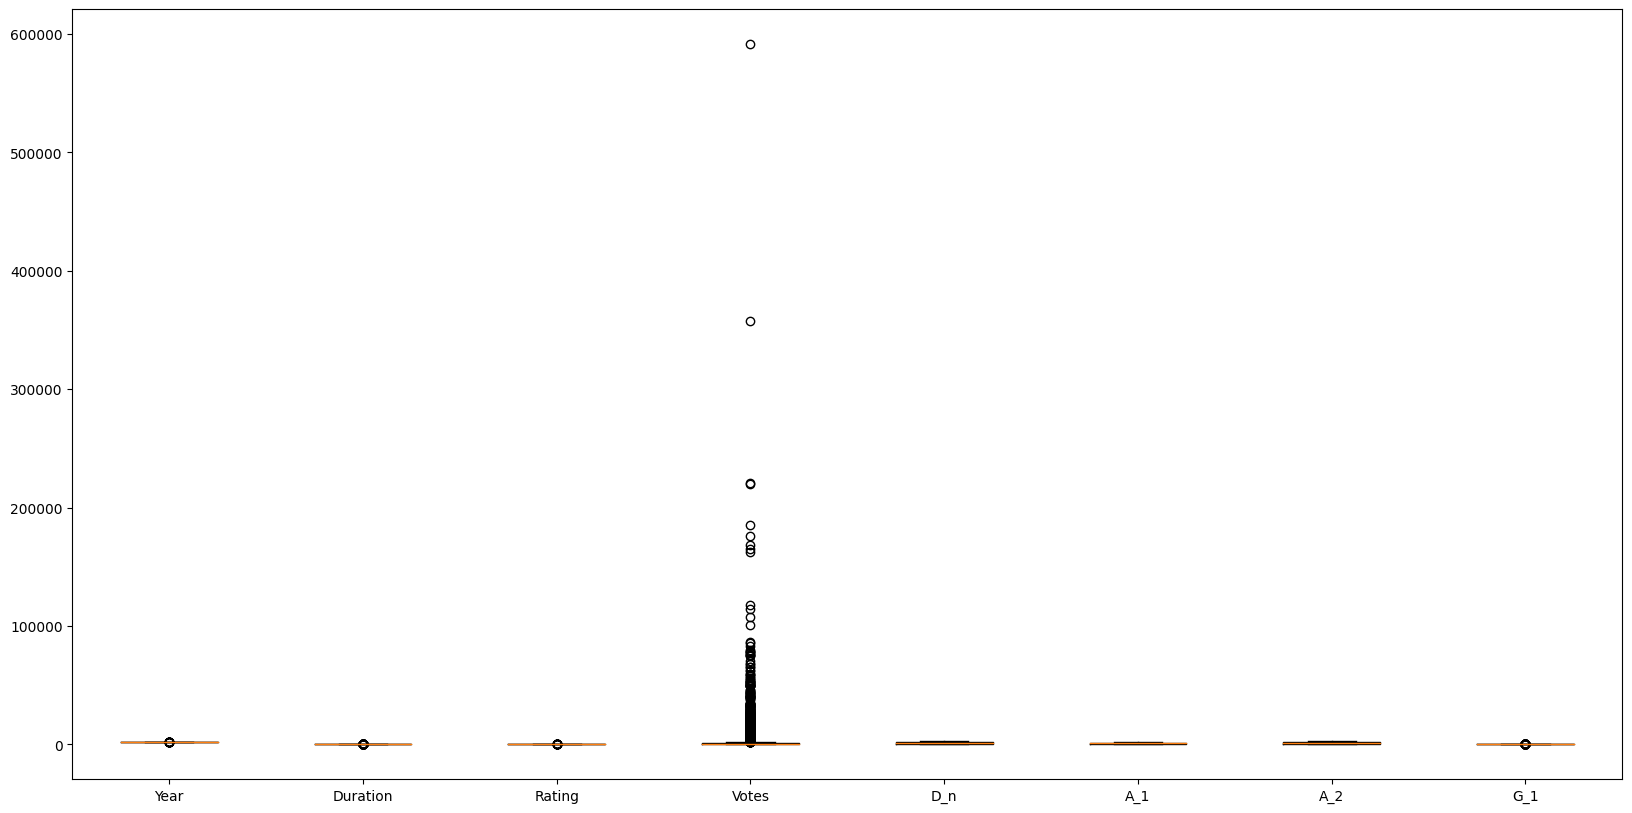

In [ ]:
plt.figure(figsize=(20,10))
plt.boxplot(mvdf, labels=mvdf.columns)
plt.show()

In [ ]:
mvdf.describe()

,Year,Duration,Rating,Votes,D_n,A_1,A_2,G_1
count,5705.000000,5705.000000,5705.000000,5705.000000,5705.000000,5705.000000,5705.000000,5705.000000
mean,1996.363891,133.130412,5.903751,2676.656091,1226.213322,984.092901,1201.096407,4.840841
std,19.728098,25.581255,1.383394,13598.359008,693.883946,574.519365,677.283663,4.220880
min,1931.000000,21.000000,1.100000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,118.000000,5.000000,30.000000,645.000000,475.000000,627.000000,0.000000
50%,2002.000000,135.000000,6.100000,128.000000,1212.000000,988.000000,1215.000000,4.000000
75%,2013.000000,150.000000,6.900000,903.000000,1812.000000,1496.000000,1796.000000,7.000000
max,2021.000000,321.000000,10.000000,591417.000000,2458.000000,1994.000000,2357.000000,19.000000


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Year', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Duration', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Votes', y='D_n', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['D_n']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('D_n')

from matplotlib import pyplot as plt
_df_13['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Year', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Duration', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Rating', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Votes', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

***Mean duration is 133.13 minutes***

***Average rating is 5.90***

***Average number of votes is (2676.66)***


In [ ]:
mvdf.corr()

,Year,Duration,Rating,Votes,D_n,A_1,A_2,G_1
Year,1.000000,-0.332001,-0.200866,0.128184,0.028445,-0.010304,-0.058592,-0.031502
Duration,-0.332001,1.000000,-0.004425,0.098520,0.015508,-0.021667,0.002459,-0.185206
Rating,-0.200866,-0.004425,1.000000,0.141014,-0.004412,0.022685,0.040277,0.078877
Votes,0.128184,0.098520,0.141014,1.000000,-0.009436,-0.029838,-0.030988,-0.077221
D_n,0.028445,0.015508,-0.004412,-0.009436,1.000000,0.022557,0.018777,-0.013522
A_1,-0.010304,-0.021667,0.022685,-0.029838,0.022557,1.000000,0.002553,0.045704
A_2,-0.058592,0.002459,0.040277,-0.030988,0.018777,0.002553,1.000000,0.021174
G_1,-0.031502,-0.185206,0.078877,-0.077221,-0.013522,0.045704,0.021174,1.000000


In [ ]:
x=mvdf.drop(['Rating'],axis=1)
y=mvdf['Rating']
x,y

(       Year  Duration  Votes   D_n   A_1   A_2  G_1
 1      2019       109      8   639  1376  2308    7
 3      2019       110     35  1352  1221   730    4
 5      1997       147    827  1547   384    76    4
 6      2005       142   1086  2066   703  1128    7
 8      2012        82    326   139  1968  1192   11
 ...     ...       ...    ...   ...   ...   ...  ...
 15493  2015       115    408  1237  1893  1827    7
 15494  2001       153   1496  2081   775  1643    3
 15503  1989       125     44  1812   412   765    0
 15505  1999       129    655  1036   116  2198    0
 15508  1998       130     20   905   475   764    0
 
 [5705 rows x 7 columns],
 1        7.0
 3        4.4
 5        4.7
 6        7.4
 8        5.6
         ... 
 15493    6.1
 15494    6.2
 15503    5.8
 15505    4.5
 15508    6.2
 Name: Rating, Length: 5705, dtype: float64)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [ ]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
y_pred

array([5.67458134, 6.40316494, 5.58337284, ..., 5.48192506, 5.53302462,
       5.49055351])

In [ ]:
linreg.score(x_test,y_pred)

1.0

***This model has a very high accuracy, meaning thene needs improvements. also the data is not good and im my opinion, IMDB is not best suited for indian movie source as most data is unavailabe. after many process, the model still was poor so i moved with this one***

In [ ]:
Mae=mean_absolute_error(y_test,y_pred)
Mse=mean_squared_error(y_test,y_pred)
R=r2_score(y_test,y_pred)
Mae,Mse,R

(1.0416538988597213, 1.8031608818166422, 0.035308536786540556)

***The model has relatively high MAE and MSE, indicating significant errors in predictions. The extremely low R² value confirms that the model is a poor fit for the data, as it explains very little of the variability in the dependent variable.***

In [ ]:
print(Directors.head())
print(Actors1.head())
print(Actors2.head())
print(Genres.head())

            Director  Number
107     A. Bhimsingh       0
1416  A. Jagannathan       1
2247        A. Majid       2
2234        A. Muthu       3
1114       A. Salaam       4
                  Actor1  Number
1547            A. Muthu       0
1340          A. Nairang       1
930          A.K. Hangal       2
143   A.S. Ravindra Babu       3
484       Aachi Manorama       4
              Actor2  Number
846       A.H. Shore       0
1048     A.K. Hangal       1
2137  Aachi Manorama       2
2020      Aadil Khan       3
2343    Aahana Kumra       4
        Genre  Number
3      Action       0
6   Adventure       1
17  Animation       2
8   Biography       3
1      Comedy       4


In [ ]:
mvdf.head()

,Year,Duration,Rating,Votes,D_n,A_1,A_2,G_1
1,2019,109,7.0,8,639,1376,2308,7
3,2019,110,4.4,35,1352,1221,730,4
5,1997,147,4.7,827,1547,384,76,4
6,2005,142,7.4,1086,2066,703,1128,7
8,2012,82,5.6,326,139,1968,1192,11


In [ ]:
import warnings
warnings.filterwarnings('ignore')
y1=linreg.predict([[2019,109,7,639,1376,2308,7]])
y2=linreg.predict([[2025,109,7,639,1376,2308,7]])
y3=linreg.predict([[2000,109,7,639,1376,2308,7]])
y4=linreg.predict([[1950,109,7,639,1376,2308,7]])
y1,y2,y3,y4


(array([5.61419365]),
 array([5.49759367]),
 array([5.98342693]),
 array([6.95509346]))

In [ ]:
d1=linreg.predict([[2019,109,7,639,1376,2308,7]])
d2=linreg.predict([[2019,77,7,639,1376,2308,7]])
d3=linreg.predict([[2019,200,7,639,1376,2308,7]])
d4=linreg.predict([[2019,1000,7,639,1376,2308,7]])
d1,d2,d3,d4

(array([5.61419365]),
 array([5.78133458]),
 array([5.13888663]),
 array([0.96036335]))

In [ ]:
v1=linreg.predict([[2019,109,7,639,1376,2308,7]])
v2=linreg.predict([[2019,109,70,639,1376,2308,7]])
v3=linreg.predict([[2019,109,700,639,1376,2308,7]])
v4=linreg.predict([[2019,109,7000,639,1376,2308,7]])
v1,v2,v3,v4

(array([5.61419365]),
 array([5.61610781]),
 array([5.63524946]),
 array([5.82666588]))

In [ ]:
Genres.head(10)

,Genre,Number
3,Action,0
6,Adventure,1
17,Animation,2
8,Biography,3
1,Comedy,4
4,Crime,5
9,Documentary,6
0,Drama,7
15,Family,8
13,Fantasy,9


In [ ]:
g1=linreg.predict([[2019,109,7,639,1376,2308,7]])
g2=linreg.predict([[2019,109,7,639,1376,2308,0]])
g3=linreg.predict([[2019,109,7,639,1376,2308,1]])
g4=linreg.predict([[2019,109,7,639,1376,2308,4]])
g1,g2,g3,g4

(array([5.61419365]),
 array([5.4463898]),
 array([5.47036178]),
 array([5.54227771]))

***Drama gets the higher rating than other generes***

***Thank You***